In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random 
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use ('fivethirtyeight')
%matplotlib inline

In [74]:
confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", encoding="utf-8")

In [75]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27


In [106]:
# df1 = confirmed_cases.iloc[:,4:101].sum()
# df1

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
4/23/20    2707742
4/24/20    2811603
4/25/20    2897624
4/26/20    2972363
4/27/20    3041764
Length: 97, dtype: int64

In [63]:
deaths_reported = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [64]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,33,36,36,40,42,43,47,50,57
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,27,27,27,27,28,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,375,384,392,402,407,415,419,425,432
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,36,37,37,37,37,40,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [65]:
recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [66]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,112,131,135,150,166,179,188,188,207,220
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,302,314,327,345,356,385,394,403,410,422
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,894,1047,1099,1152,1204,1355,1408,1479,1508,1558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,205,235,248,282,309,333,344,344,344,385
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [67]:
latest_data =pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")

In [68]:
latest_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3585,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
3586,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
3587,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
3588,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [136]:
dropcol =confirmed_cases.drop(["Province/State","Country/Region", "Lat", "Long"],axis=1)
dropcol
cols =dropcol.keys()
cols
# drop =confirmed_cases.drop(["Province/State"],axis=1)
# drop

# rows=confirmed_cases.()
# rows

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [160]:
confirmed = dropcol.loc[:, cols[0]:cols[-1]]
deaths = dropcol.loc[:, cols[0]:cols[-1]]
recoveries = dropcol.loc[:, cols[0]:cols[-1]]


In [161]:

dropdates = confirmed_cases.drop(["Province/State","Country/Region", "Lat", "Long"],axis=1)
dates = dropdates.keys()
print(dates)

world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
indea_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
indea_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
indea_recoveries = []

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [163]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-deaths_sum-recovered_sum)
    
    mortality_rate.append(deaths_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
#     france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
#     uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    indea_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
#     france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
#     uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    indea_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
#     france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
#     uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    indea_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
    
    
    
    
    
    
    

    
    

In [164]:
 world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145219,
 156116,
 167466,
 181603,
 197113,
 214846,
 242616,
 272247,
 304555,
 337018,
 378282,
 418079,
 467723,
 529701,
 593423,
 660824,
 720285,
 782490,
 857608,
 932638,
 1013458,
 1095876,
 1176059,
 1249737,
 1321427,
 1396438,
 1480200,
 1565538,
 1657929,
 1736025,
 1835164,
 1905192,
 1975581,
 2055506,
 2151872,
 2239723,
 2317339,
 2400843,
 2471759,
 2548821,
 2624107,
 2707742,
 2811603,
 2897624,
 2972363,
 3041764]

In [128]:
confirmed_sum

3041764

In [129]:
us_cases

[0,
 0,
 'US',
 37.0902,
 -95.7129,
 1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 51,
 51,
 57,
 58,
 60,
 68,
 74,
 98,
 118,
 149,
 217,
 262,
 402,
 518,
 583,
 959,
 1281,
 1663,
 2179,
 2727,
 3499,
 4632,
 6421,
 7783,
 13747,
 19273,
 25600,
 33276,
 43843,
 53736,
 65778,
 83836,
 101657,
 121465,
 140909,
 161831,
 188172,
 213242,
 243622,
 275367,
 308650,
 336802,
 366317,
 397121,
 428654,
 462780,
 496535,
 526396,
 555313,
 580619,
 607670,
 636350,
 667592,
 699706,
 732197,
 758809,
 784326,
 811865,
 840351,
 869170,
 905358,
 938154,
 965785,
 988197,
 0,
 0,
 'US',
 37.0902,
 -95.7129,
 1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 51,
 51,
 57,
 58,
 60,
 68,
 74,
 98,
 118,
 149,
 217,
 262,
 402,
 518,
 583,
 959,
 1281,
 1663,
 2179,
 2727,
 3499,
 46

In [165]:
def daily_increase(data):
    d=[]
    for i in range(len(data)):
        if i ==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [167]:
wIncrease = daily_increase(total_deaths)
cIncrease = daily_increase(china_cases)
iIncrease = daily_increase(italy_cases)
uIncrease = daily_increase(us_cases)
sIncrease = daily_increase(spain_cases)
fIncrease = daily_increase(france_cases)
gIncrease = daily_increase(germany_cases)
ukIncrease = daily_increase(uk_cases)
inIncrease = daily_increase(indea_cases)

In [170]:
# deaths on a daily scale
wDeaths = daily_increase(total_deaths)
cDeaths = daily_increase(china_deaths)
iDeaths = daily_increase(italy_deaths)
uDeaths = daily_increase(us_deaths)
sDeaths = daily_increase(spain_deaths)
fDeaths = daily_increase(france_deaths)
gDeaths = daily_increase(germany_deaths)
ukDeaths = daily_increase(uk_deaths)
inDeaths = daily_increase(indea_deaths)

In [171]:
wRecovery = daily_increase(total_recovered)
cRecovery = daily_increase(china_recoveries)
iRecovery = daily_increase(italy_recoveries)
uRecovery = daily_increase(us_recoveries)
sRecovery = daily_increase(spain_recoveries)
fRecovery = daily_increase(france_recoveries)
gRecovery = daily_increase(germany_recoveries)
ukRecovery = daily_increase(uk_recoveries)
inRecovery = daily_increase(indea_recoveries)

In [174]:
unique_countries = list(latest_data["Country_Region"].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary'

In [202]:
country_confirmed_cases = []
country_deaths_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []

for i in unique_countries:
    cases= latest_data[latest_data["Country_Region"]==i]["Population"].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)
    
# sort for by cases
# make a csv with total global confirmed,deaths and recovered into 1 csv

unique_countries = [k for k, v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=False)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data["Country_Region"]==unique_countries[i]]["Population"].sum()
    country_deaths_cases.append(latest_data[latest_data["Country_Region"]==unique_countries[i]]["Population"].sum())
    country_recovery_cases.append(latest_data[latest_data["Country_Region"]==unique_countries[i]]["Population"].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_deaths_cases[i]-country_recovery_cases[i])
    country_mortality_rate.append(country_deaths_cases[i]/country_confirmed_cases[1])
    


In [206]:
country_df = pd.DataFrame({"Country Name":unique_countries,"Number of Confirmed Cases":country_confirmed_cases,
                           'Number of Death':country_deaths_cases,"number of recoveries":country_recovery_cases,
                            'Number of active cases':country_mortality_rate,"Mortality Rate":country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Death,number of recoveries,Number of active cases,Mortality Rate
0,Holy See,809.000000,809.000000,809.000000,0.023838,0.023838
1,San Marino,33938.000000,33938.000000,33938.000000,1.000000,1.000000
2,Liechtenstein,38137.000000,38137.000000,38137.000000,1.123726,1.123726
3,Monaco,39244.000000,39244.000000,39244.000000,1.156344,1.156344
4,Saint Kitts and Nevis,53192.000000,53192.000000,53192.000000,1.567329,1.567329
5,Dominica,71991.000000,71991.000000,71991.000000,2.121251,2.121251
6,Andorra,77265.000000,77265.000000,77265.000000,2.276652,2.276652
7,Antigua and Barbuda,97928.000000,97928.000000,97928.000000,2.885497,2.885497
8,Seychelles,98340.000000,98340.000000,98340.000000,2.897637,2.897637
9,Saint Vincent and the Grenadines,110947.000000,110947.000000,110947.000000,3.269108,3.269108


In [209]:
unique_province = list(latest_data["Province_State"].unique())

In [215]:
province_confirmed_cases=[]
province_country=[]
province_death_cases=[]
province_recovery_cases=[]
province_mortality_rate=[]

no_cases = []

for i in unique_province:
    cases= latest_data[latest_data["Province_State"]==i]["Population"].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_province.remove(i)
    
unique_province = [k for k, v in sorted(zip(unique_province,province_confirmed_cases),key=operator.itemgetter(1),reverse=False)]
for i in range(len(unique_province)):
    province_confirmed_cases[i] = latest_data[latest_data["Province_State"]==unique_province[i]]["Population"].sum()
    province_country.append(latest_data[latest_data["Province_State"]==unique_province[i]]["Country_Region"].unique()[0])
    province_death_cases.append(latest_data[latest_data["Province_State"]==unique_province[i]]["Population"].sum())
    province_recovery_cases.append(latest_data[latest_data["Province_State"]==unique_province[i]]["Population"].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [216]:
province_df = pd.DataFrame({"province Name":unique_province,"Country":province_country,
                           'Number of confirmed cases':province_confirmed_cases,"number of deaths":province_death_cases,
                            'Number recoveries':province_death_cases,"Mortality Rate":province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,province Name,Country,Number of confirmed cases,number of deaths,Number recoveries,Mortality Rate
0,Falkland Islands (Malvinas),United Kingdom,3483.000000,3483.000000,3483.000000,1.000000
1,Montserrat,United Kingdom,4999.000000,4999.000000,4999.000000,1.000000
2,Saint Pierre and Miquelon,France,5795.000000,5795.000000,5795.000000,1.000000
3,Saint Barthelemy,France,9885.000000,9885.000000,9885.000000,1.000000
4,Anguilla,United Kingdom,15002.000000,15002.000000,15002.000000,1.000000
5,"Bonaire, Sint Eustatius and Saba",Netherlands,26221.000000,26221.000000,26221.000000,1.000000
6,British Virgin Islands,United Kingdom,30237.000000,30237.000000,30237.000000,1.000000
7,Gibraltar,United Kingdom,33691.000000,33691.000000,33691.000000,1.000000
8,St Martin,France,38659.000000,38659.000000,38659.000000,1.000000
9,Turks and Caicos Islands,United Kingdom,38718.000000,38718.000000,38718.000000,1.000000


In [222]:
# dealing with missing values

nan_indices = []

#handling nan if there is any, it is usally a float:float("nan")

for i in range(len(unique_province)):
    if type(unique_province[i])==float:
        nan_indices.append[i]
        
unique_province = list(unique_province)
province_confirmed_cases =list(province_confirmed_cases)

for i in nan_indices:
    unique_province.pop(i)
    province_confirmed_cases.pop(i)

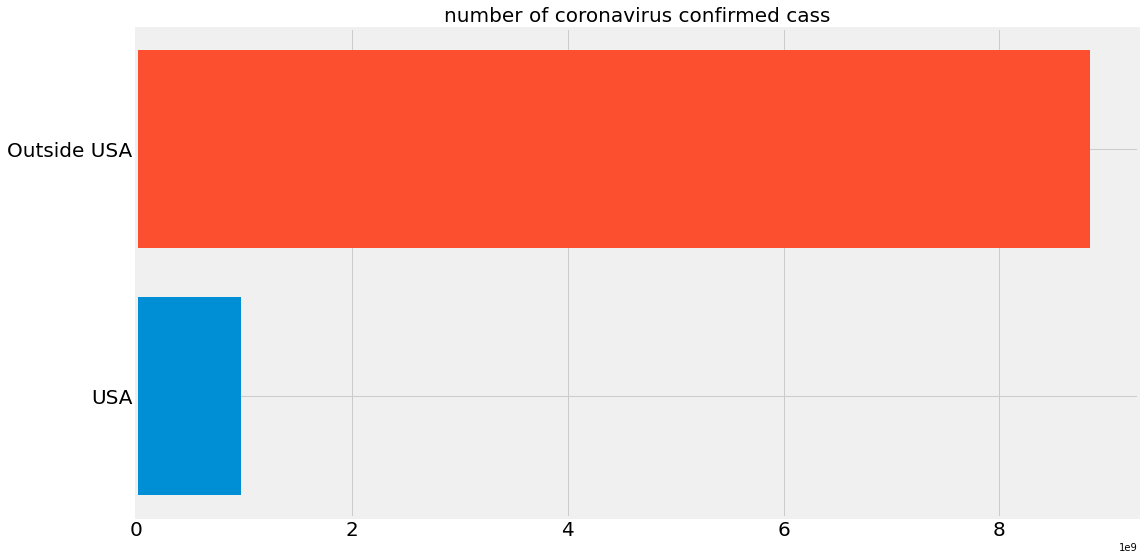

In [227]:
USA_confirmed = latest_data[latest_data["Country_Region"]=="US"]["Population"].sum()
outside_USA_confirmed =np.sum(country_confirmed_cases)-USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh("USA",USA_confirmed)
plt.barh("Outside USA", outside_USA_confirmed)
plt.title("number of coronavirus confirmed cass", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [228]:
print("Outside USA {} Cases:".format(outside_USA_confirmed))

Outside USA 8841597756.0 Cases:


In [230]:
# only show countryes with the most confirmed cases and group the rest together

visual_unique_countries = []
visual_unique_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_unique_cases.append(country_confirmed_cases[i])

visual_unique_countries.append("Others")
visual_unique_cases.append(others)

In [234]:
def plot_bar_graphs(x,y,title):
    plt.figure(figsize=(16, 9))
    plt.barh(x,y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

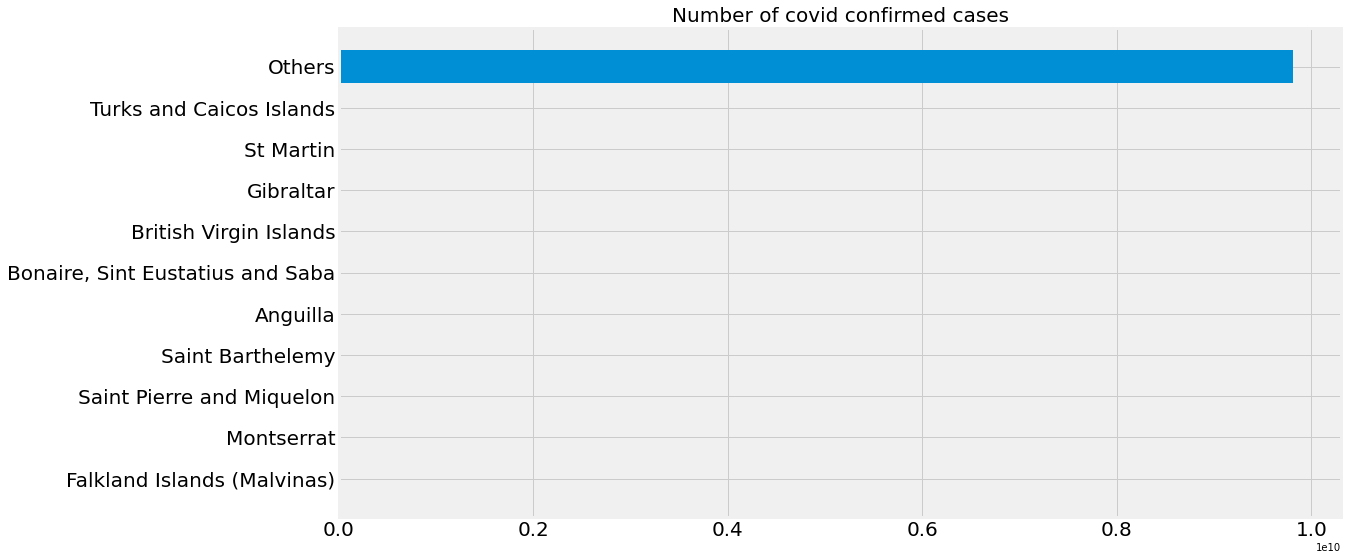

In [235]:
plot_bar_graphs(visual_unique_countries,visual_unique_cases, "Number of covid confirmed cases")

In [237]:
days_since_1_22= np.array([i for i in range (len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [239]:
days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[-20]

In [240]:
future_forcast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [245]:
start= "1/22/20"
start_date = datetime.datetime.strptime(start,'%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
    

In [246]:
X_train, X_test, y_train, y_test = train_test_split(days_since_1_22,world_cases,test_size=.25, shuffle=False)

In [249]:
# transform our data for polynomial regression

poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_future_forcast= poly.fit_transform(future_forcast)

In [252]:
#polynomial regression

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_linear_pred = linear_model.predict(poly_X_test)
linear_pred = linear_model.predict(poly_future_forcast)

print("MAE:", mean_absolute_error(test_linear_pred, y_test))

print("MSE:", mean_squared_error(test_linear_pred, y_test))


MAE: 172343.87626787656
MSE: 54097652301.72943


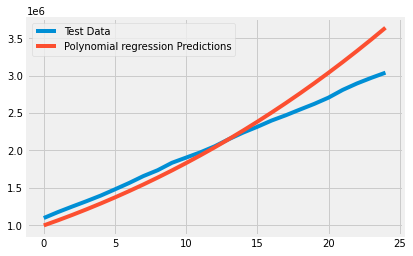

In [253]:
plt.plot(y_test)
plt.plot(test_linear_pred)
plt.legend(["Test Data", "Polynomial regression Predictions"])

In [257]:
# build our model using suport vector machine (SVM)

svm_confirmed = SVR(shrinking= True, kernel="poly", gamma=0.01, epsilon=1, degree=5, C=0.1)
svm_confirmed.fit(X_train, y_train)
svm_pred = svm_confirmed.predict (future_forcast)


c:\users\ecanu\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 265489.6552454628
MSE: 139718600180.29932


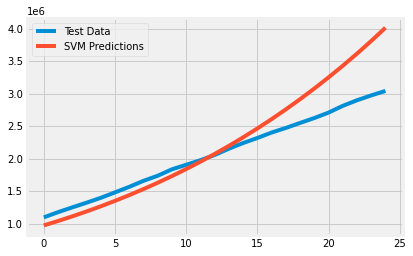

In [258]:
svm_test_pred =svm_confirmed.predict(X_test)
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.legend(["Test Data", "SVM Predictions"])


print("MAE:", mean_absolute_error(svm_test_pred, y_test))

print("MSE:", mean_squared_error(svm_test_pred, y_test))


In [303]:
adjusted_dates=np.array(adjusted_dates)
adjusted_dates

array([[97]])

In [304]:
# world_cases= world_cases.reshape(1, -1)
# world_cases

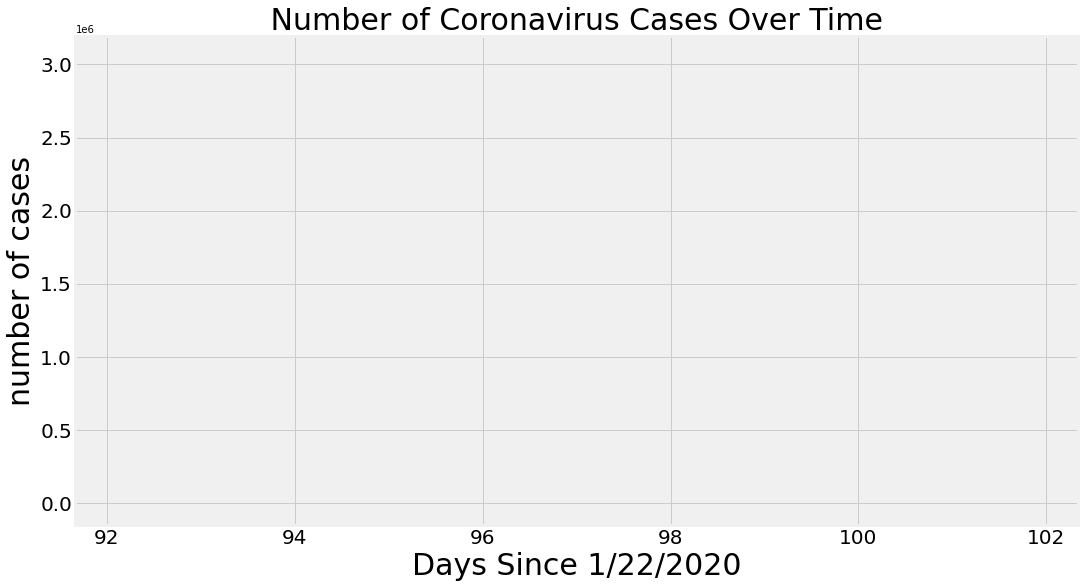

In [308]:
# adjusted_dates =adjusted_dates.reshape(1, -1)[0]
adjusted_dates
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title(" Number of Coronavirus Cases Over Time ", size=30)
plt.xlabel("Days Since 1/22/2020", size=30)
plt.ylabel("number of cases", size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()